Data pertaining to the startup companies is provided below. Train a decision tree to predict the profit of the companies based on other variables.

Does the state in which the startup is impact its profit?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from cubist import Cubist

In [2]:
# Load data
startup = pd.read_csv('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Tree-Based-Models-main/05_Startups_profit.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Check info
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
# Create dummies for categorical variable State
startup_onehot = pd.get_dummies(startup, columns=['State'])
startup_onehot.sample(5)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
7,130298.13,145530.06,323876.68,155752.60,0,1,0
19,86419.70,153514.11,0.00,122776.86,0,0,1
25,64664.71,139553.16,137962.62,107404.34,1,0,0
16,78013.11,121597.55,264346.06,126992.93,1,0,0
48,542.05,51743.15,0.00,35673.41,0,0,1


In [5]:
# Train the model usin CART Regression Tree
X = startup_onehot.drop('Profit', axis=1)
y = startup_onehot['Profit']

clf = DecisionTreeRegressor(random_state=42)
clf = clf.fit(X,y)

In [6]:
# Tree depth
clf.get_depth()

8

In [7]:
text_representation = export_text(clf)
print(text_representation)

|--- feature_0 <= 77528.56
|   |--- feature_0 <= 25766.92
|   |   |--- feature_0 <= 771.14
|   |   |   |--- feature_2 <= 22586.53
|   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |--- value: [35673.41]
|   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |--- value: [42559.73]
|   |   |   |--- feature_2 >  22586.53
|   |   |   |   |--- value: [14681.40]
|   |   |--- feature_0 >  771.14
|   |   |   |--- feature_2 <= 241189.78
|   |   |   |   |--- feature_2 <= 166633.10
|   |   |   |   |   |--- feature_2 <= 31934.45
|   |   |   |   |   |   |--- feature_1 <= 139479.59
|   |   |   |   |   |   |   |--- value: [64926.08]
|   |   |   |   |   |   |--- feature_1 >  139479.59
|   |   |   |   |   |   |   |--- value: [65200.33]
|   |   |   |   |   |--- feature_2 >  31934.45
|   |   |   |   |   |   |--- feature_2 <= 91767.64
|   |   |   |   |   |   |   |--- value: [69758.98]
|   |   |   |   |   |   |--- feature_2 >  91767.64
|   |   |   |   |   |   |   |--- value: [71498.49]
|   |  

In [8]:
# Calculate Accuracy
clf.score(X,y)

1.0

In [9]:
pd.Series(clf.feature_importances_, index=X.columns)

R&D Spend           0.866580
Administration      0.001761
Marketing Spend     0.130431
State_California    0.001160
State_Florida       0.000054
State_New York      0.000014
dtype: float64

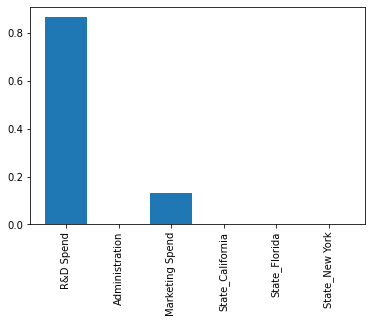

In [10]:
plt.figure(figsize=(6,4))
plt.bar(np.arange(X.shape[1]), np.squeeze(np.abs(clf.feature_importances_)))
plt.xticks(np.arange(X.shape[1]), ['R&D Spend', 'Administration', 'Marketing Spend', 
                                   'State_California', 'State_Florida', 'State_New York'],
          rotation=90)
plt.show()

**Does the state in which the startup is impact its profit?**

The feature importance is almost 0 for State, hence do not impact the profit of startup

In [11]:
# Cubist Model Tree
cub_mod = Cubist(random_state=42)
cub_mod.fit(X,y)

Cubist(random_state=42)

In [12]:
cub_mod.feature_importances_

,Conditions,Model,Variable,Conditions,Model,Variable
0,0.0,100.0,Spend,0,0,Administration
1,0.0,100.0,Spend,0,0,State_California
2,NaN,NaN,NaN,0,0,State_New York
3,NaN,NaN,NaN,0,0,State_Florida
4,NaN,NaN,NaN,0,0,Marketing Spend
5,NaN,NaN,NaN,0,0,R&D Spend


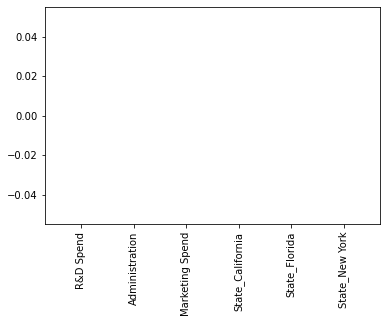

In [13]:
plt.figure(figsize=(6,4))
importance = cub_mod.feature_importances_
imp_last3_col = importance.iloc[:, -3:]
plt.bar(imp_last3_col.Variable, imp_last3_col.Conditions)
x_names = ['R&D Spend', 'Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']
plt.xticks(imp_last3_col.Variable, x_names, rotation = 90)
plt.show()

In [14]:
# Calculate Accuracy
np.round(cub_mod.score(X,y),2)

0.95

In [15]:
print(cub_mod.rules_)

None
